<a href="https://colab.research.google.com/github/TmTrojcak/Computational_Physics/blob/main/Tyler_Trojcak_16_Lab10_Random_Walk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Expectations for All Notebooks
* Be sure to read instructions carefully and answer all questions.
* Use formatted printing and descriptive print statements
* You must include comment strings for all functions
* ALL PLOTS NEED LABELS ON X AND Y AXES
* If more than one data set is plotted, you must include a legend.
* Plot discrete data with points rather than a line.
```python
plt.plot(x, y, 'bs')
```
or
```python
plt.scatter(x,y)
```

# Lab 10: Random Walk and Diffusion

## Overview
We will study:
* random walk in 1 dimension
* random walk in 2D
* diffusion


In [1]:
# import numpy and pyplot
import numpy as np
import matplotlib.pyplot as plt

# Part 0: Random Numbers

### Uniform Random Numbers

We will use `np.random.random` to generate random numbers between zero and 1.  

* random numbers drawn from other distributions


### Part 0a: Rolling a Die

(5 points)

Create a function called `rolldie` that doesn't take any input but returns a number from one to six.

* Call you function 10, 100, and 1000 times, and create a histogram from the resulting values.

* You should plot the three cases (10, 100,1000 rolls) side by side in one figure.

**QUESTION**
1. Comment on the distribution and how it changes as the number of rolls increases.
**As the amount of rolls increase the sread of results becomes more evenly distributed.**

In [2]:
# your function rolldie here
def rolldie():
  number = np.random.randint(1,7)
  return number

[2, 6, 3, 5, 5, 6, 6, 3, 5, 1]
[1, 3, 5, 1, 3, 1, 4, 2, 2, 1, 4, 5, 4, 6, 5, 3, 6, 1, 1, 2, 2, 5, 3, 3, 2, 1, 3, 6, 3, 3, 6, 1, 3, 3, 2, 3, 5, 4, 4, 4, 4, 1, 3, 2, 1, 1, 1, 6, 5, 5, 3, 5, 1, 3, 1, 1, 4, 3, 4, 4, 2, 4, 2, 6, 2, 3, 2, 2, 6, 1, 3, 2, 6, 2, 6, 2, 2, 2, 4, 1, 3, 1, 1, 5, 4, 1, 5, 4, 6, 2, 2, 1, 6, 5, 3, 5, 3, 4, 6, 2]
[5, 2, 2, 4, 3, 3, 6, 5, 3, 4, 6, 3, 6, 1, 4, 5, 1, 1, 2, 6, 4, 3, 3, 1, 3, 1, 1, 3, 4, 1, 3, 4, 4, 4, 5, 4, 4, 3, 1, 4, 2, 1, 3, 4, 3, 4, 1, 2, 1, 3, 1, 4, 3, 4, 3, 4, 6, 2, 5, 1, 1, 4, 5, 3, 5, 4, 3, 5, 2, 1, 3, 1, 6, 4, 1, 5, 1, 6, 4, 4, 6, 3, 6, 4, 1, 3, 1, 2, 6, 3, 5, 1, 5, 3, 3, 1, 2, 3, 2, 1, 1, 3, 4, 5, 4, 3, 2, 6, 3, 4, 5, 1, 2, 5, 1, 2, 1, 1, 6, 3, 5, 4, 4, 1, 3, 4, 5, 5, 4, 4, 2, 1, 3, 5, 3, 1, 2, 3, 1, 5, 5, 1, 3, 5, 5, 2, 4, 4, 4, 3, 1, 5, 4, 1, 6, 4, 6, 3, 5, 3, 2, 5, 4, 6, 1, 4, 3, 5, 5, 1, 2, 3, 3, 1, 1, 6, 4, 6, 2, 6, 6, 1, 5, 4, 6, 1, 6, 6, 4, 5, 1, 4, 6, 3, 4, 1, 1, 4, 2, 5, 2, 1, 2, 3, 3, 4, 3, 5, 1, 6, 1, 2, 1, 6, 2, 2, 2, 2, 6, 2, 1, 1, 4

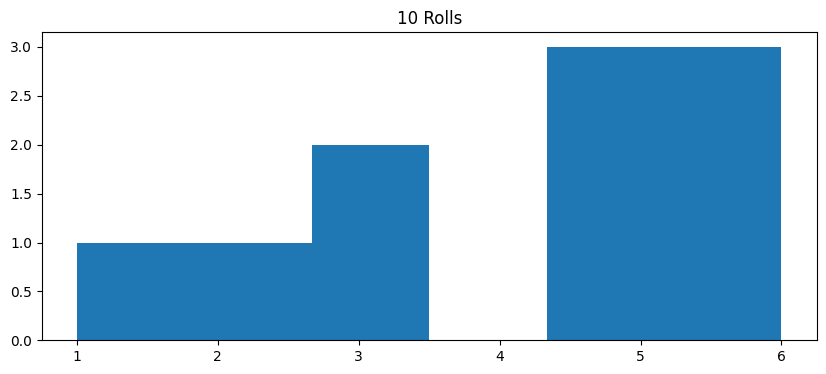

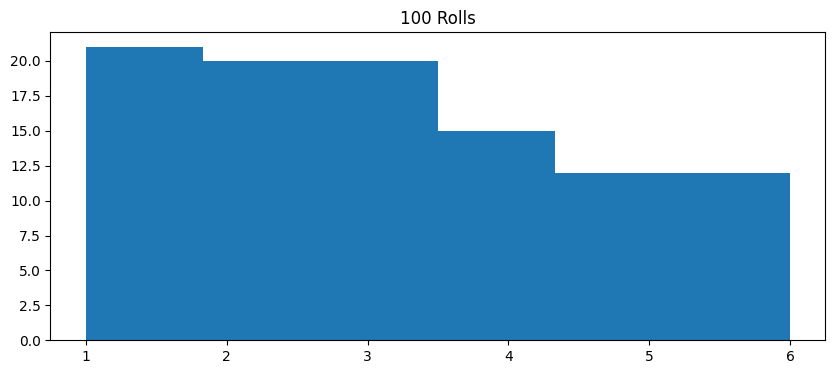

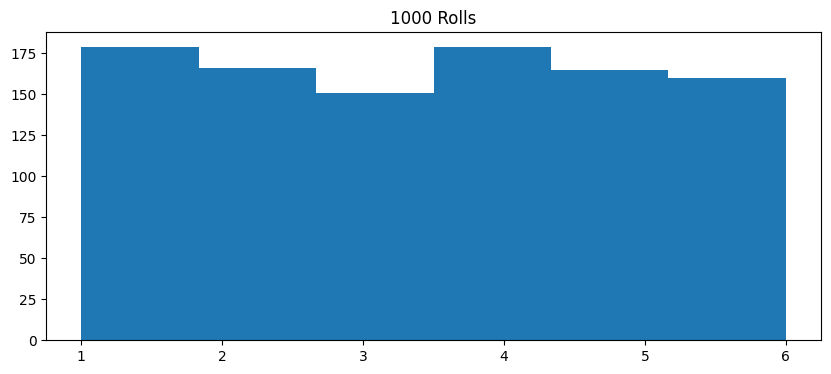

In [3]:
# call your function and make your plot here
rolls10 = []
for i in range(10):
  rolls10.append(rolldie())
print(rolls10)

rolls100 = []
for i in range(100):
  rolls100.append(rolldie())
print(rolls100)

rolls1000 = []
for i in range(1000):
  rolls1000.append(rolldie())
print(rolls1000)

# plot results
plt.figure(figsize=(10,4))
plt.hist(rolls10, bins=6)
plt.title("10 Rolls")
plt.show()

plt.figure(figsize=(10,4))
plt.hist(rolls100, bins=6)
plt.title("100 Rolls")
plt.show()

plt.figure(figsize=(10,4))
plt.hist(rolls1000, bins=6)
plt.title("1000 Rolls")
plt.show()

# Part 1: Random Walkers in One Dimension

* We will start with a one-dimensional random walker.
* Assume that our walker can take a step of length 1, and that the direction is either left (negative) or right (positive).
* The walker is equally likely to move left or right with each step.
* To determine the direction of the step, draw a random number.  
  * If the random number is < 0.5, then the walker steps to the left.
  * Otherwise the walker steps right.
* We will assume that the time between steps is fairly constant, so that the step number is directly proportional to time.

### Part 1a: Write a Function

(5 points)

Write a function called `randomwalker` that will calculate the position of a random walker for Nsteps.

Input
* optional argument `Nsteps`, which has a default value of 100.
* optional argument `stepsize`, which has a default value of 1.

The function will:
* initialize an array `x` of length `Nsteps` to store the x values at each step.
* calculate the walker's position at each of the steps

Return
* the position array




In [4]:
# Your randomwalker function here
def randomwalker(Nsteps=100, stepsize=1):
  x = np.zeros(Nsteps)
  for i in range(Nsteps):
    rand = np.random.random()
    if rand < 0.5:
      x[i] = x[i-1] - stepsize
    else:
      x[i] = x[i-1] + stepsize
  return x

### Part 1b: Two Random Walkers

(5 points)

* Use your `randomwalker` function to get the position of two walkers who take 100 steps.
* Make a plot of the walker's position as a function of step number.  You should plot both walkers on the same graph, but use a different symbol for each.  Be sure to plot with points rather than a line.
* Include all necessary labels on your graph.


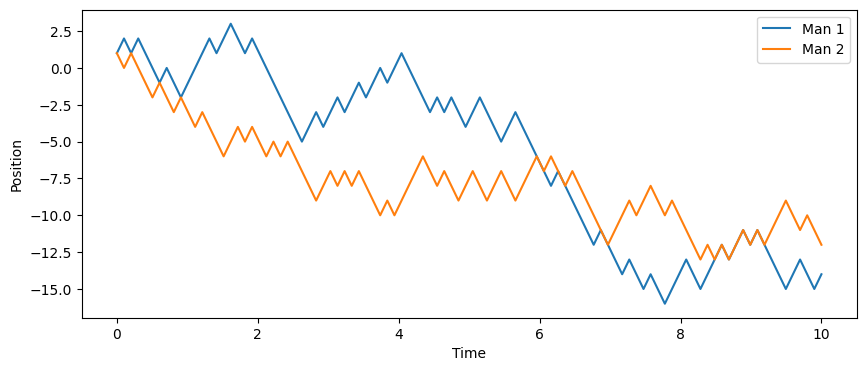

In [5]:
# your code and graph here
time = np.linspace(0, 10, 100)
man1 = randomwalker(100)
man2 = randomwalker(100)
plt.figure(figsize=(10,4))
plt.plot(time, man1, label="Man 1")
plt.plot(time, man2, label="Man 2")
plt.xlabel("Time")
plt.ylabel("Position")
plt.legend()

### Part 1-c: Calculate the mean square distance for a large ensemble of walkers

(5 points)

* The goal is to create a plot of the average of the square of the distance, $\langle x^2 \rangle$, as a function of step number.  
* We will calculate this for a sample of 500 walkers, where each walker takes 100 steps.
* We will then fit $\langle x^2 \rangle$ as a function of step number and plot the best-fit relation with the data.


In [6]:
Nwalkers = 500
Nsteps = 100
# create an array xsq_sum to store 100 values of the x^2
xsq_sum = np.zeros(Nsteps)

# create a loop to call your function 500 times (or Nwalkers times)
for i in range(Nwalkers):
  x = randomwalker(Nsteps)

# after each call, square the x values that are returned and add them to xsum
  xsq = x**2
  xsq_sum += xsq

# once the loop is over, divide xsum by the number of walkers to get xsq_ave
xsq_avg = xsq_sum/Nwalkers

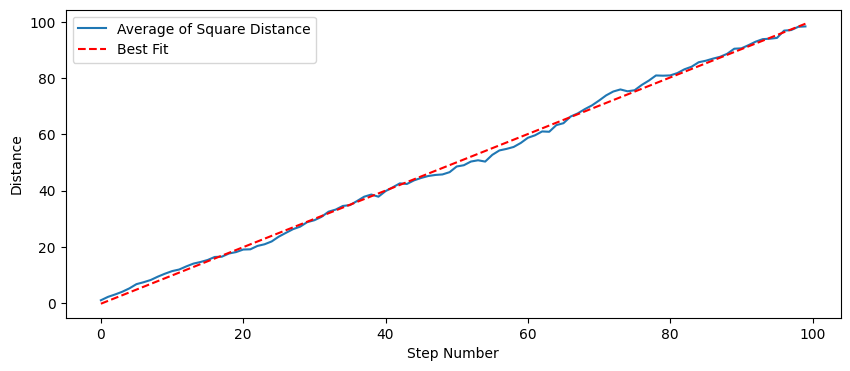

In [7]:
# create a plot of xsq_ave versus the number of steps.
plt.figure(figsize=(10,4))
plt.plot(xsq_avg, label="Average of Square Distance")
plt.xlabel("Step Number")
plt.ylabel("Distance")


# fit a polynomial to your data
time = np.arange(Nsteps)
coeffs = np.polyfit(time, xsq_avg, 1)
poly = np.poly1d(coeffs)
fitted_line = poly(time)

# plot the best-fit polynomial with the data
plt.plot(time, fitted_line, "r--", label="Best Fit")
plt.legend()

In [8]:
slope, intercept = coeffs
print(f"The slope is {slope}")
print(f"The intercept is {intercept}")

The slope is 1.0062924692469246
The intercept is -0.23083722772276588


**QUESTION**

2. Report Your Best-Fit Function Here

**- fit a polynomial to your data**

**time = np.arange(Nsteps)**

**coeffs = np.polyfit(time, xsq_avg, 1)**

**poly = np.poly1d(coeffs)**

**fitted_line = poly(time)**

**- plot the best-fit polynomial with the data**

**plt.plot(time, fitted_line, "r--", label="Best Fit")**

**plt.legend()**


### Part 1-d: The Relationship between the step size and best-fit slope.

(5 points)

Repeat the $\langle x^2 \rangle$ calculation for step sizes of 2, 3, and 4

**QUESTIONS**

3. Fill in the values for the slope

| Step Size | Slope |
|----|----|
| 1| 0.9829213321332133|
| 2| 4.090702190219021|
| 3| 8.856501602160217|
| 4| 16.99961356135613|

4. What is the general relation between the slope and the step size?

**As stepsize increases the overall slope vastly increases, multiplying by 2 from the last slope for ever step increase of 1.**


5. How does the root-mean-square distance $\sqrt{\langle x^2 \rangle}$ scale with time?

**The root-means-square distance scales as a square when plotted with time.**



The slope is 4.442683756375638
The intercept is -6.086285940594064


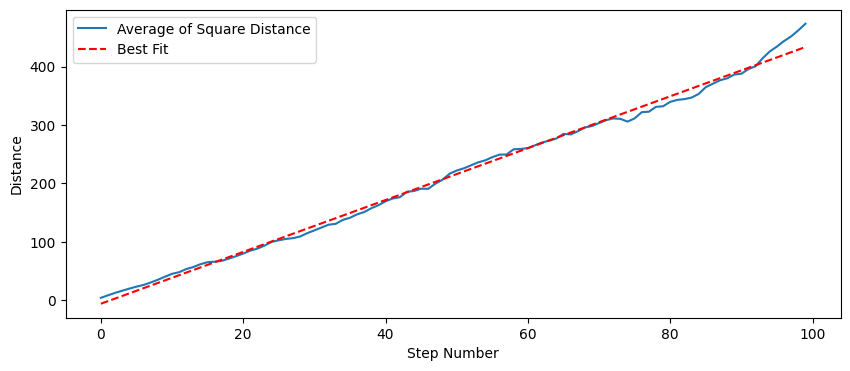

In [9]:
#################################################
### STEP SIZE = 2                             ###
#################################################
Nwalkers = 500
Nsteps = 100
# create an array xsq_sum to store 100 values of the x^2
xsq_sum = np.zeros(Nsteps)

# create a loop to call your function 500 times (or Nwalkers times)
for i in range(Nwalkers):
  x = randomwalker(Nsteps, 2)

# after each call, square the x values that are returned and add them to xsum
  xsq = x**2
  xsq_sum += xsq

# once the loop is over, divide xsum by the number of walkers to get xsq_ave
xsq_avg = xsq_sum/Nwalkers

# create a plot of xsq_ave versus the number of steps.
plt.figure(figsize=(10,4))
plt.plot(xsq_avg, label="Average of Square Distance")
plt.xlabel("Step Number")
plt.ylabel("Distance")


# fit a polynomial to your data
time = np.arange(Nsteps)
coeffs = np.polyfit(time, xsq_avg, 1)
poly = np.poly1d(coeffs)
fitted_line = poly(time)

# plot the best-fit polynomial with the data
plt.plot(time, fitted_line, "r--", label="Best Fit")
plt.legend()

slope, intercept = coeffs
print(f"The slope is {slope}")
print(f"The intercept is {intercept}")

The slope is 8.935698577857787
The intercept is -5.449159603960413


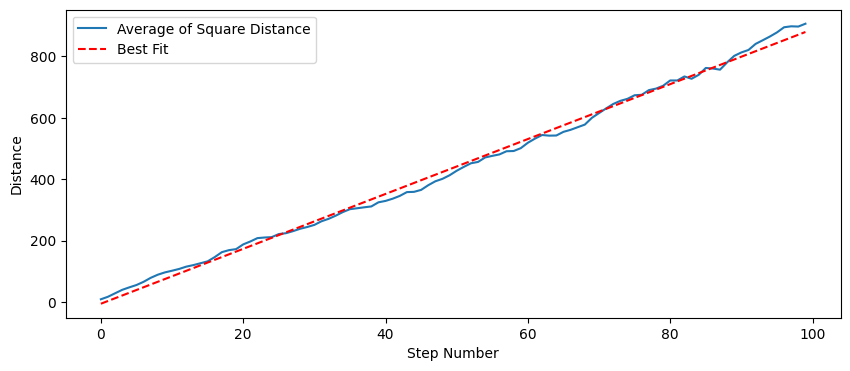

In [10]:
#################################################
### STEP SIZE = 3                             ###
#################################################
Nwalkers = 500
Nsteps = 100
# create an array xsq_sum to store 100 values of the x^2
xsq_sum = np.zeros(Nsteps)

# create a loop to call your function 500 times (or Nwalkers times)
for i in range(Nwalkers):
  x = randomwalker(Nsteps, 3)

# after each call, square the x values that are returned and add them to xsum
  xsq = x**2
  xsq_sum += xsq

# once the loop is over, divide xsum by the number of walkers to get xsq_ave
xsq_avg = xsq_sum/Nwalkers

# create a plot of xsq_ave versus the number of steps.
plt.figure(figsize=(10,4))
plt.plot(xsq_avg, label="Average of Square Distance")
plt.xlabel("Step Number")
plt.ylabel("Distance")


# fit a polynomial to your data
time = np.arange(Nsteps)
coeffs = np.polyfit(time, xsq_avg, 1)
poly = np.poly1d(coeffs)
fitted_line = poly(time)

# plot the best-fit polynomial with the data
plt.plot(time, fitted_line, "r--", label="Best Fit")
plt.legend()

slope, intercept = coeffs
print(f"The slope is {slope}")
print(f"The intercept is {intercept}")

The slope is 14.611995343534351
The intercept is 14.517430495049505


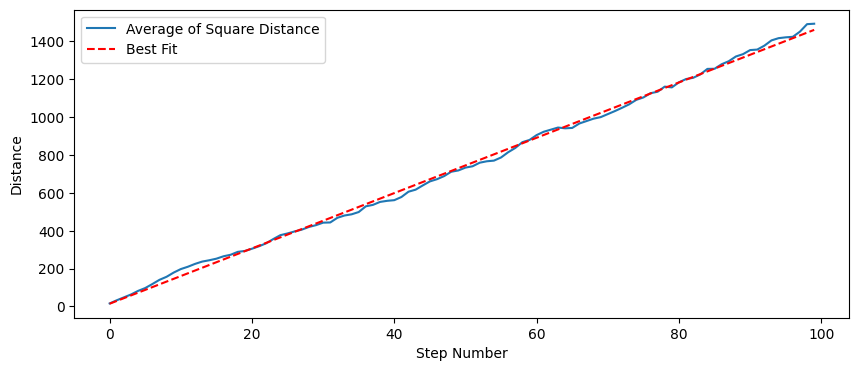

In [11]:
#################################################
### STEP SIZE = 4                             ###
#################################################
Nwalkers = 500
Nsteps = 100
# create an array xsq_sum to store 100 values of the x^2
xsq_sum = np.zeros(Nsteps)

# create a loop to call your function 500 times (or Nwalkers times)
for i in range(Nwalkers):
  x = randomwalker(Nsteps, 4)

# after each call, square the x values that are returned and add them to xsum
  xsq = x**2
  xsq_sum += xsq

# once the loop is over, divide xsum by the number of walkers to get xsq_ave
xsq_avg = xsq_sum/Nwalkers

# create a plot of xsq_ave versus the number of steps.
plt.figure(figsize=(10,4))
plt.plot(xsq_avg, label="Average of Square Distance")
plt.xlabel("Step Number")
plt.ylabel("Distance")


# fit a polynomial to your data
time = np.arange(Nsteps)
coeffs = np.polyfit(time, xsq_avg, 1)
poly = np.poly1d(coeffs)
fitted_line = poly(time)

# plot the best-fit polynomial with the data
plt.plot(time, fitted_line, "r--", label="Best Fit")
plt.legend()

slope, intercept = coeffs
print(f"The slope is {slope}")
print(f"The intercept is {intercept}")

# Part 2: Random Walk in 2D

(5 points)

Simulate a random walk in two dimensions by allowing the walker to make steps of unit length in a random direction.  

Show that the motion is diffusive, that is, that $\langle r^2 \rangle \sim t$.  Remember that our step number is proportional to $t$.

NOTE: this part is purposely short on instructions.  We are closing in on the end of the course, so I am expecting you to think through the logic and adapt previous code to address the new problem.  

In [12]:
# write a function randomwalker2d here
def randomwalker2d(Nsteps=100, stepsize=1):
  x = np.zeros(Nsteps)
  y = np.zeros(Nsteps)
  for i in range(Nsteps):
    theta = np.random.random() * 2*np.pi
    x[i] = x[i-1] + stepsize*np.cos(theta)
    y[i] = y[i-1] + stepsize*np.sin(theta)
  return x, y



Text(0, 0.5, 'y')

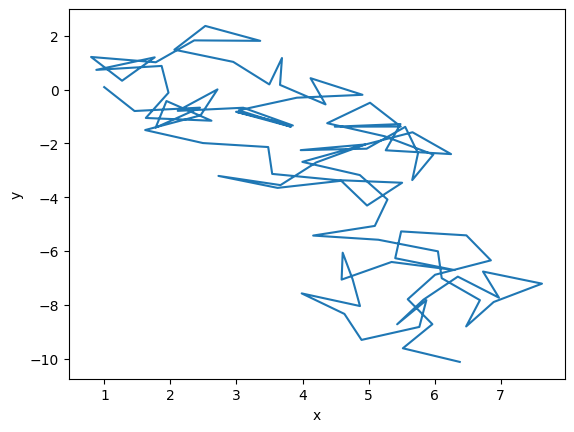

In [13]:
# create a test for your randomwalker2d function and plot the resulting (x,y) positions
x2d, y2d = randomwalker2d(100)
plt.figure()
plt.plot(x2d, y2d)
plt.xlabel("x")
plt.ylabel("y")

Text(0, 0.5, 'y')

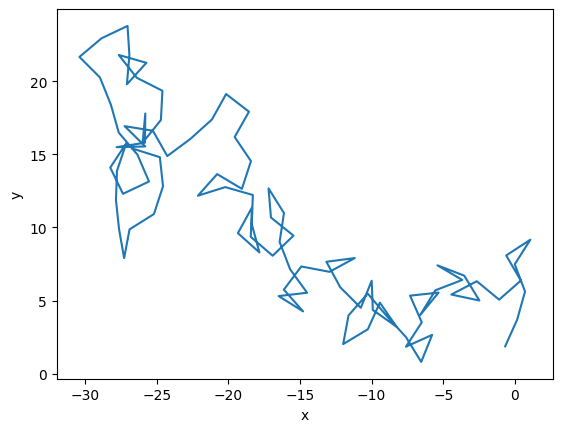

In [14]:
#################################################
### STEP SIZE = 2                             ###
#################################################

# create a test for your randomwalker2d function and plot the resulting (x,y) positions
x2d, y2d = randomwalker2d(100, stepsize=2)
plt.figure()
plt.plot(x2d, y2d)
plt.xlabel("x")
plt.ylabel("y")


Text(0, 0.5, 'y')

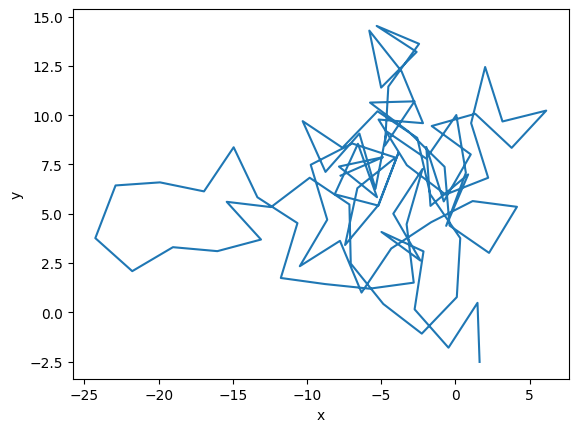

In [15]:
#################################################
### STEP SIZE = 3                             ###
#################################################

# create a test for your randomwalker2d function and plot the resulting (x,y) positions
x2d, y2d = randomwalker2d(100, stepsize=3)
plt.figure()
plt.plot(x2d, y2d)
plt.xlabel("x")
plt.ylabel("y")


Text(0, 0.5, 'y')

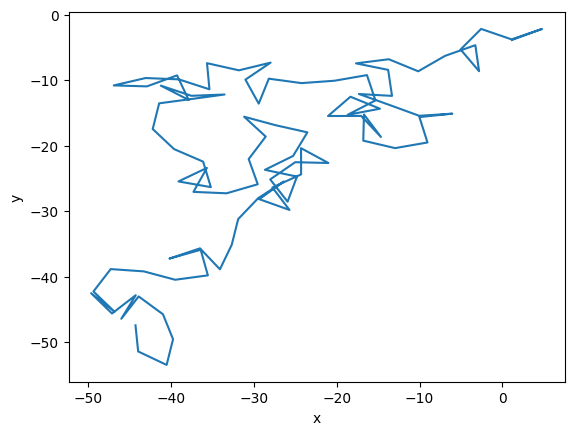

In [16]:
#################################################
### STEP SIZE = 4                             ###
#################################################

# create a test for your randomwalker2d function and plot the resulting (x,y) positions
x2d, y2d = randomwalker2d(100, stepsize=4)
plt.figure()
plt.plot(x2d, y2d)
plt.xlabel("x")
plt.ylabel("y")


**Since the stepsize is greater the overall distance travelled by the walker is greater.**

# Part 3: Brownian Motion

(10 points)

Let's simulate the motion of a particle in a gas as it undergoes random collisions with gas molecules.

* Use your program from Part 2, but we will now confine the particle to a box of length $L=10$.  

* Start the particle off in the center of the box.

* If the particle gets to the edge of the box, pick another random number for its direction.   (Hint: you might want to implement this part with a `while` loop.)


In [59]:
# Your code here
def brownian(Nsteps=100, stepsize=1, L=10):
  x = np.zeros(Nsteps)
  y = np.zeros(Nsteps)

  x[0] = L/2
  y[0] = L/2

  for i in range(1, Nsteps):
    theta = np.random.random() * 2*np.pi
    x[i] = x[i-1] + stepsize*np.cos(theta)
    y[i] = y[i-1] + stepsize*np.sin(theta)
    while x[i] < 0 or x[i] > L or y[i] < 0 or y[i] > L:
      theta = np.random.random() * 2*np.pi
      x[i] = x[i-1] + stepsize*np.cos(theta)
      y[i] = y[i-1] + stepsize*np.sin(theta)
  return x, y





Text(0, 0.5, 'y')

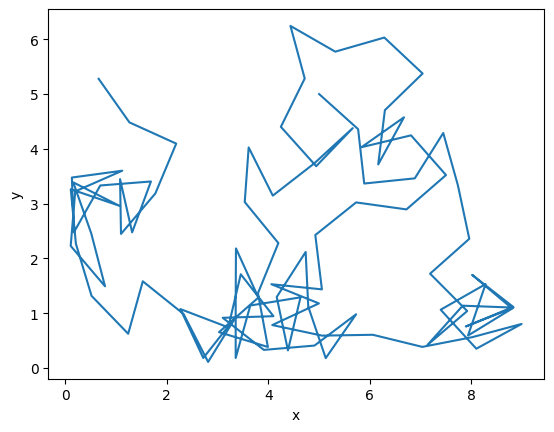

In [64]:
# plot the (x,y) position of the particle using 100 steps
x2d, y2d = brownian(Nsteps=100, stepsize=1, L=10)
plt.figure()
plt.plot(x2d, y2d)
plt.xlabel("x")
plt.ylabel("y")

Text(0, 0.5, 'y')

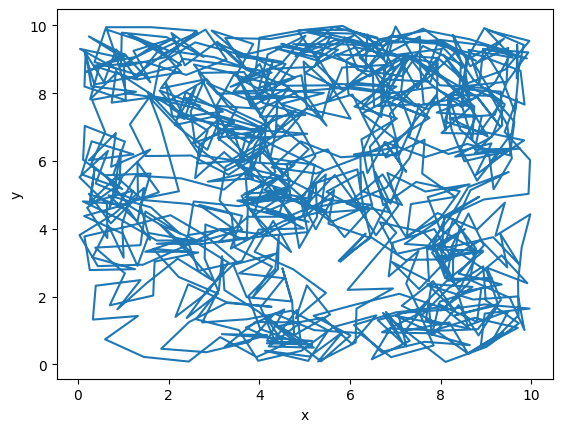

In [67]:
# plot the (x,y) position of the particle using 1000 steps
x2d, y2d = brownian(Nsteps=1000, stepsize=1, L=10)
plt.figure()
plt.plot(x2d, y2d)
plt.xlabel("x")
plt.ylabel("y")

Text(0, 0.5, 'y')

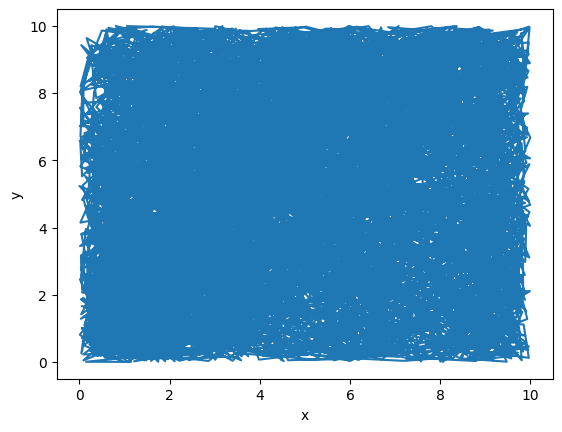

In [68]:
# plot the (x,y) position of the particle using 10000 steps
x2d, y2d = brownian(Nsteps=10000, stepsize=1, L=10)
plt.figure()
plt.plot(x2d, y2d)
plt.xlabel("x")
plt.ylabel("y")

# Part 4 - Animate your Brownian Motion!

(5 pts)

- We are now going to animate the motion of the particle in a gas.  Please refer to our previous animation notebook (https://colab.research.google.com/drive/1lqp_y9Ng37Mq-a7urMiZsI0fBMNdCNRJ?usp=sharing) for examples of how to use animation.

- Read through the cells below and add any missing code.  Then run the animation.

- Play around with the animation settings to get the speed right - we want to be able to view the particle moving.

- When you have it working, try increasing the number of steps to 100 to follow the particle for a longer time.

In [20]:
from matplotlib.animation import FuncAnimation
from matplotlib import rc


In [76]:
# ANIMATION CODE
# number of steps of random walker
nsteps = 10
print(f"Our animation will have {nsteps} timesteps")
L = 10 # length of the box that the particle is in


# call your random walker function to get the
# x and y positions
# pass in the length of the box L and the number of steps nsteps
xrand, yrand = brownian(nsteps, L=L)

fig = plt.figure()
# set the range of our axes to the size of the box
ax = plt.axes(xlim=(0, L), ylim=(0,L))


# We also need to create an empty point that we'll draw into each frame
# This looks weird but it's just a regular plot...with no data in it!
point, = ax.plot([], [], 'ro', markersize=20)

# We need an initialization function that empties the point at the start
# of the animation
#
# These initialization routines are fairly common in other programs and
# routines.
#
# Note that all this is doing is emptying out the data!
def init():
    point.set_data([], [])
    return point,

# Now we need an animate function that takes in the step number
# and sets the values for the points
def animate(i):
    xpos = [xrand[i]]
    ypos = [yrand[i]]
    point.set_data(xpos, ypos)
    return point,

# Note that the number of frames is the number of steps here, though it doesn't have to be
# interval is the time in milliseconds between frames
# blit is whether or not to *only* draw the new stuff, see what happens when it's False
anim_walker = FuncAnimation(fig, animate, init_func=init,
                               frames=nsteps, interval=100, blit=True)

# We need this so it doesn't draw an extra figure
plt.close()

Our animation will have 10 timesteps


In [77]:
# Run the animation here
rc('animation', html='jshtml')
anim_walker


# Bonus!

(3 points)

Add a line to your animation of Brownian motion to show the path that the particle travels.  This should be in addition to the red point that shows its current location.

Refer back to our animation notebook for help - the sine curve animation should be most helpful!